In [124]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors

In [125]:
df=pd.read_csv('TayraWebScrapping.csv')
df.head(8)


,Prices,Estat_types,Descriptions,Locations
0,80DT,Locations de vacances,Appartement S1 luxueux meublé pour vos vacance...,"Tunis, 30 minutes ago"
1,4DT,Autres Immobiliers,immeuble a vendre,"Monastir, an hour ago"
2,1600DT,Appartements,A louer un S+2 avec vue sur lac aux jardins de...,"Tunis, an hour ago"
3,450DT,Terrains et Fermes,ارض بقصور غرناطة,"Sousse, an hour ago"
4,1600DT,Appartements,Un grand S plus Trois Haut Standing,"Monastir, 2 hours ago"
5,290000DT,Maisons et Villas,Villa inachevée à cité Olympique,"Sousse, 2 hours ago"
6,100DT,Locations de vacances,location vacances appartement deux chambres sa...,"Tunis, 2 hours ago"
7,2700DT,Maisons et Villas,A LOUER étage villà s3 à la marsa vue panoramique,"Tunis, 2 hours ago"


In [126]:
df['Locations']=df['Locations'].str.split(',').str[0]

In [127]:
df['Prices']=df['Prices'].str.replace('DT','')

In [128]:
df=df.rename(columns={'Prices':'Prices(DT)'})

In [129]:
UnwantedValues = ['A LOUER' ,'s+2','09']
condition = ~df['Locations'].isin(UnwantedValues)
df=df[condition]

In [130]:
df['Locations'] = df['Locations'].replace('La Manouba', 'Manouba')


In [131]:
df.head(8)

,Prices(DT),Estat_types,Descriptions,Locations
0,80,Locations de vacances,Appartement S1 luxueux meublé pour vos vacance...,Tunis
1,4,Autres Immobiliers,immeuble a vendre,Monastir
2,1600,Appartements,A louer un S+2 avec vue sur lac aux jardins de...,Tunis
3,450,Terrains et Fermes,ارض بقصور غرناطة,Sousse
4,1600,Appartements,Un grand S plus Trois Haut Standing,Monastir
5,290000,Maisons et Villas,Villa inachevée à cité Olympique,Sousse
6,100,Locations de vacances,location vacances appartement deux chambres sa...,Tunis
7,2700,Maisons et Villas,A LOUER étage villà s3 à la marsa vue panoramique,Tunis


In [132]:
df['Prices(DT)'] = df['Prices(DT)'].astype(int)

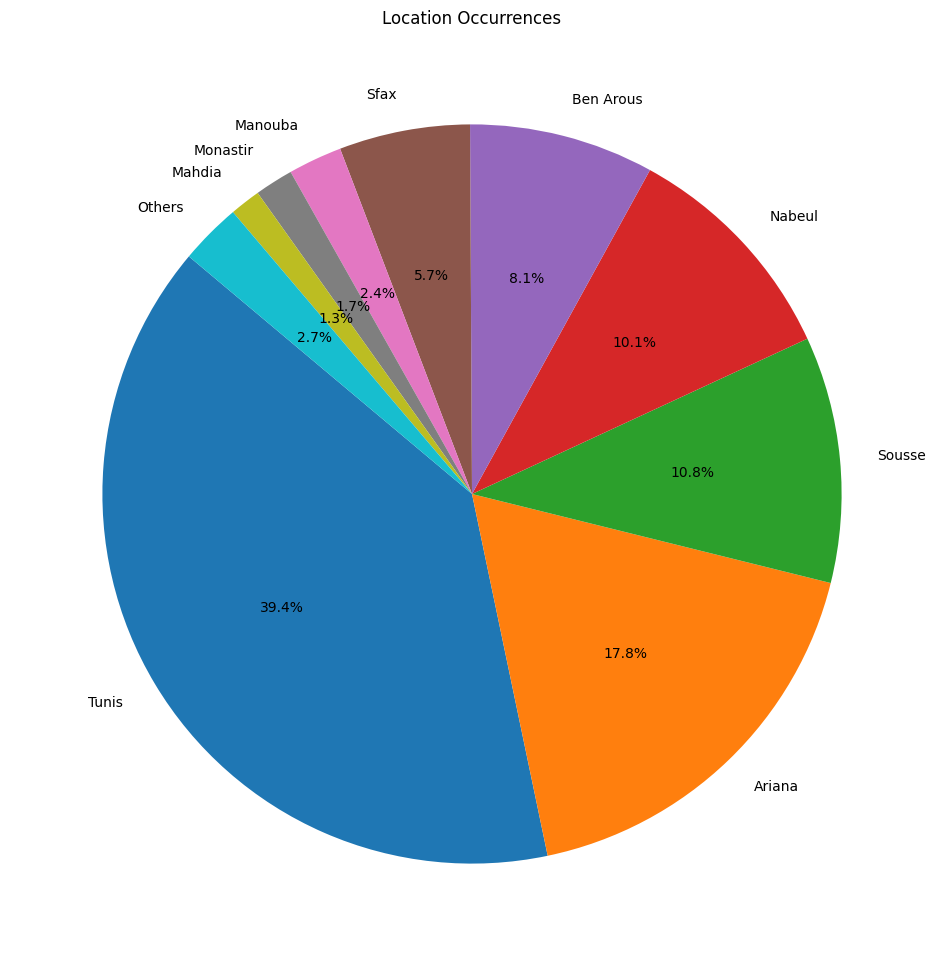

In [133]:
location_counts = df['Locations'].value_counts()
threshold = 0.013 
 
filtered_location_counts = location_counts[location_counts / location_counts.sum() >= threshold]
filtered_location_counts['Others'] = location_counts[location_counts / location_counts.sum() < threshold].sum()

plt.figure(figsize=(12, 12))
plt.pie(filtered_location_counts, labels=filtered_location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Location Occurrences')
plt.show()

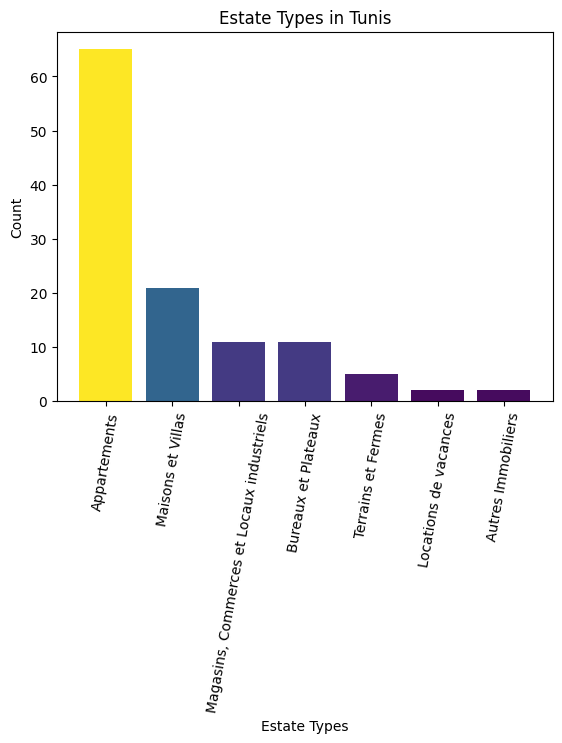

In [134]:
locations = df.loc[df['Locations']=='Tunis']
estat_type_counts = locations['Estat_types'].value_counts()

colors = cm.viridis(estat_type_counts.values / max(estat_type_counts.values))

plt.bar(estat_type_counts.index, estat_type_counts.values , color=colors)
plt.xlabel('Estate Types')
plt.ylabel('Count')
plt.title('Estate Types in Tunis')
plt.xticks(rotation=80)
plt.show()

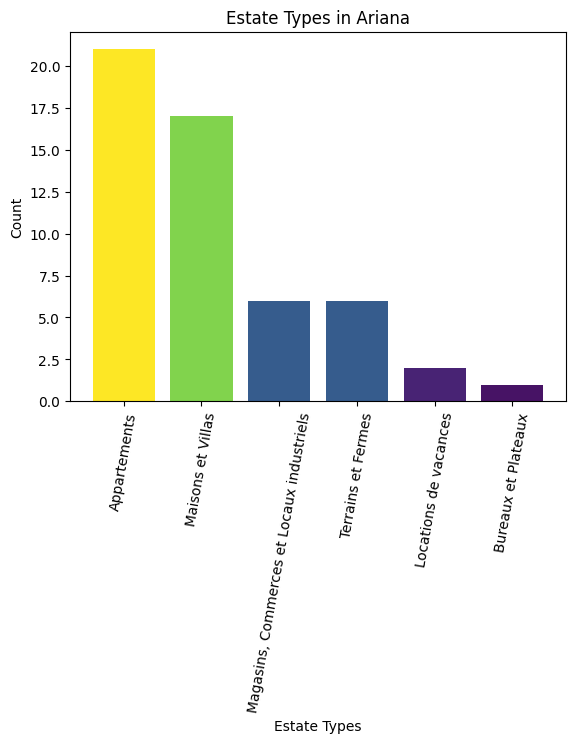

In [135]:
locations = df.loc[df['Locations']=='Ariana']
estat_type_counts = locations['Estat_types'].value_counts()

colors = cm.viridis(estat_type_counts.values / max(estat_type_counts.values))
plt.bar(estat_type_counts.index, estat_type_counts.values , color=colors)
plt.xlabel('Estate Types')
plt.ylabel('Count')
plt.title('Estate Types in Ariana')
plt.xticks(rotation=80)
plt.show()

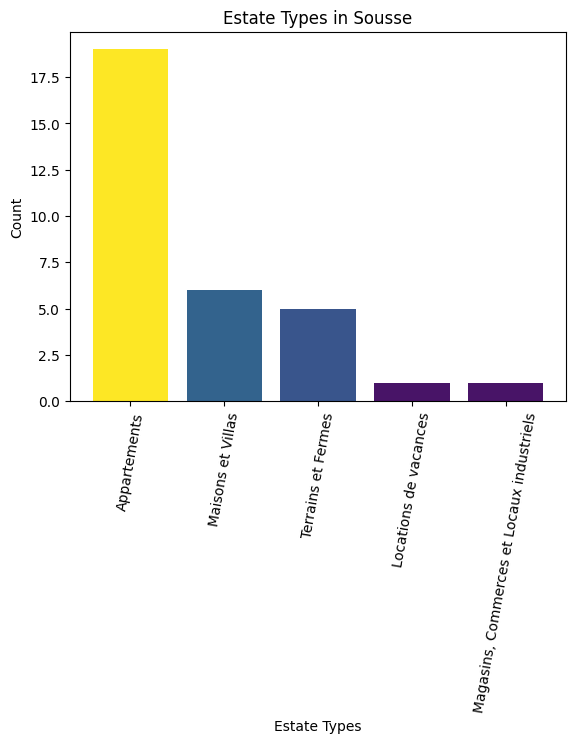

In [136]:
locations = df.loc[df['Locations']=='Sousse']
estat_type_counts = locations['Estat_types'].value_counts()

colors = cm.viridis(estat_type_counts.values / max(estat_type_counts.values))
plt.bar(estat_type_counts.index, estat_type_counts.values , color=colors)
plt.xlabel('Estate Types')
plt.ylabel('Count')
plt.title('Estate Types in Sousse')
plt.xticks(rotation=80)
plt.show()

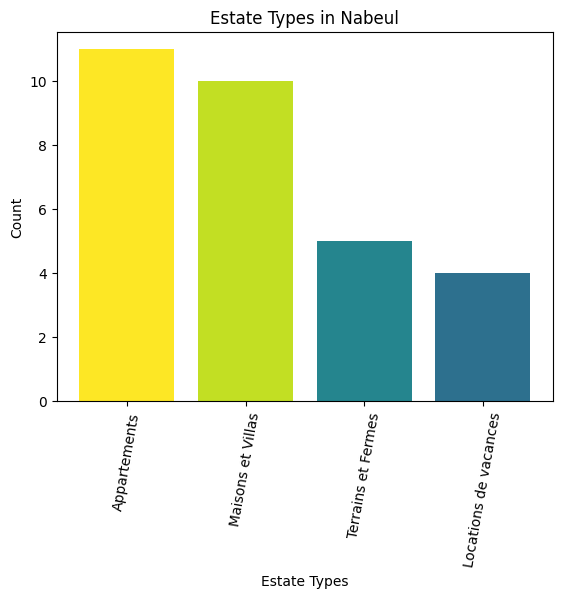

In [137]:
locations = df.loc[df['Locations']=='Nabeul']
estat_type_counts = locations['Estat_types'].value_counts()

colors = cm.viridis(estat_type_counts.values / max(estat_type_counts.values))
plt.bar(estat_type_counts.index, estat_type_counts.values , color=colors)
plt.xlabel('Estate Types')
plt.ylabel('Count')
plt.title('Estate Types in Nabeul')
plt.xticks(rotation=80)
plt.show()

In [138]:
Tunisia=gpd.read_file('shapefile/output_shapefile.shp')
Tunisia.head(5)

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_AR,ADM1_EN,ADM1_AR,ADM0_EN,ADM0_AR,ADM0_PCODE,validTo,city,beds,cases,geometry
0,1.609485,0.026511,Tunis,????,North East,?????? ??????,Tunisia,????,TN,NaN,Tunis,108.0,28.0,"POLYGON ((10.29404 36.81224, 10.29385 36.81228..."
1,1.665691,0.042112,Ariana,??????,North East,?????? ??????,Tunisia,????,TN,NaN,Ariana,32.0,17.0,"POLYGON ((10.21642 37.11139, 10.21638 37.11128..."
2,1.717957,0.066610,Ben Arous,?? ????,North East,?????? ??????,Tunisia,????,TN,NaN,NaN,NaN,NaN,"POLYGON ((10.29404 36.81224, 10.29285 36.81081..."
3,2.261815,0.115345,Manouba,?????,North East,?????? ??????,Tunisia,????,TN,NaN,Manouba,7.0,1.0,"POLYGON ((10.00005 36.91816, 10.00053 36.91749..."
4,3.307740,0.284068,Nabeul,????,North East,?????? ??????,Tunisia,????,TN,NaN,Nabeul,12.0,1.0,"POLYGON ((10.50427 36.30571, 10.50290 36.30583..."


In [139]:
todrop=['city','beds','cases','validTo','ADM0_AR','ADM1_AR','ADM2_AR']
Tunisia=Tunisia.drop(columns=todrop)

In [140]:
Tunisia = Tunisia.merge(df, left_on='ADM2_EN',right_on='Locations', how='left')

In [141]:
Tunisia.iloc[40:45] 

,Shape_Leng,Shape_Area,ADM2_EN,ADM1_EN,ADM0_EN,ADM0_PCODE,geometry,Prices(DT),Estat_types,Descriptions,Locations
40,1.609485,0.026511,Tunis,North East,Tunisia,TN,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",800.0,Appartements,A louer S+3 - Derrière Closerie - 52026677 - F...,Tunis
41,1.609485,0.026511,Tunis,North East,Tunisia,TN,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",700.0,Appartements,s+1 à Dar Fadhal,Tunis
42,1.609485,0.026511,Tunis,North East,Tunisia,TN,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",1100.0,Terrains et Fermes,terrain bhar lazre9,Tunis
43,1.609485,0.026511,Tunis,North East,Tunisia,TN,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",350.0,Maisons et Villas,location studio s0 à bardo,Tunis
44,1.609485,0.026511,Tunis,North East,Tunisia,TN,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",620000.0,Maisons et Villas,a vendre duplex haut standing a ain zaghouan n...,Tunis


In [159]:
location_data = Tunisia['Locations'].value_counts()
estat_type_counts = pd.DataFrame({'Location': location_data.index, 'Count': location_data.values})

Tunisia = Tunisia.merge(estat_type_counts, left_on='Locations',right_on='Location', how='left')

Tunisia['Count'].fillna(0, inplace=True)  
Tunisia['Count'] = Tunisia['Count'].astype(int)  

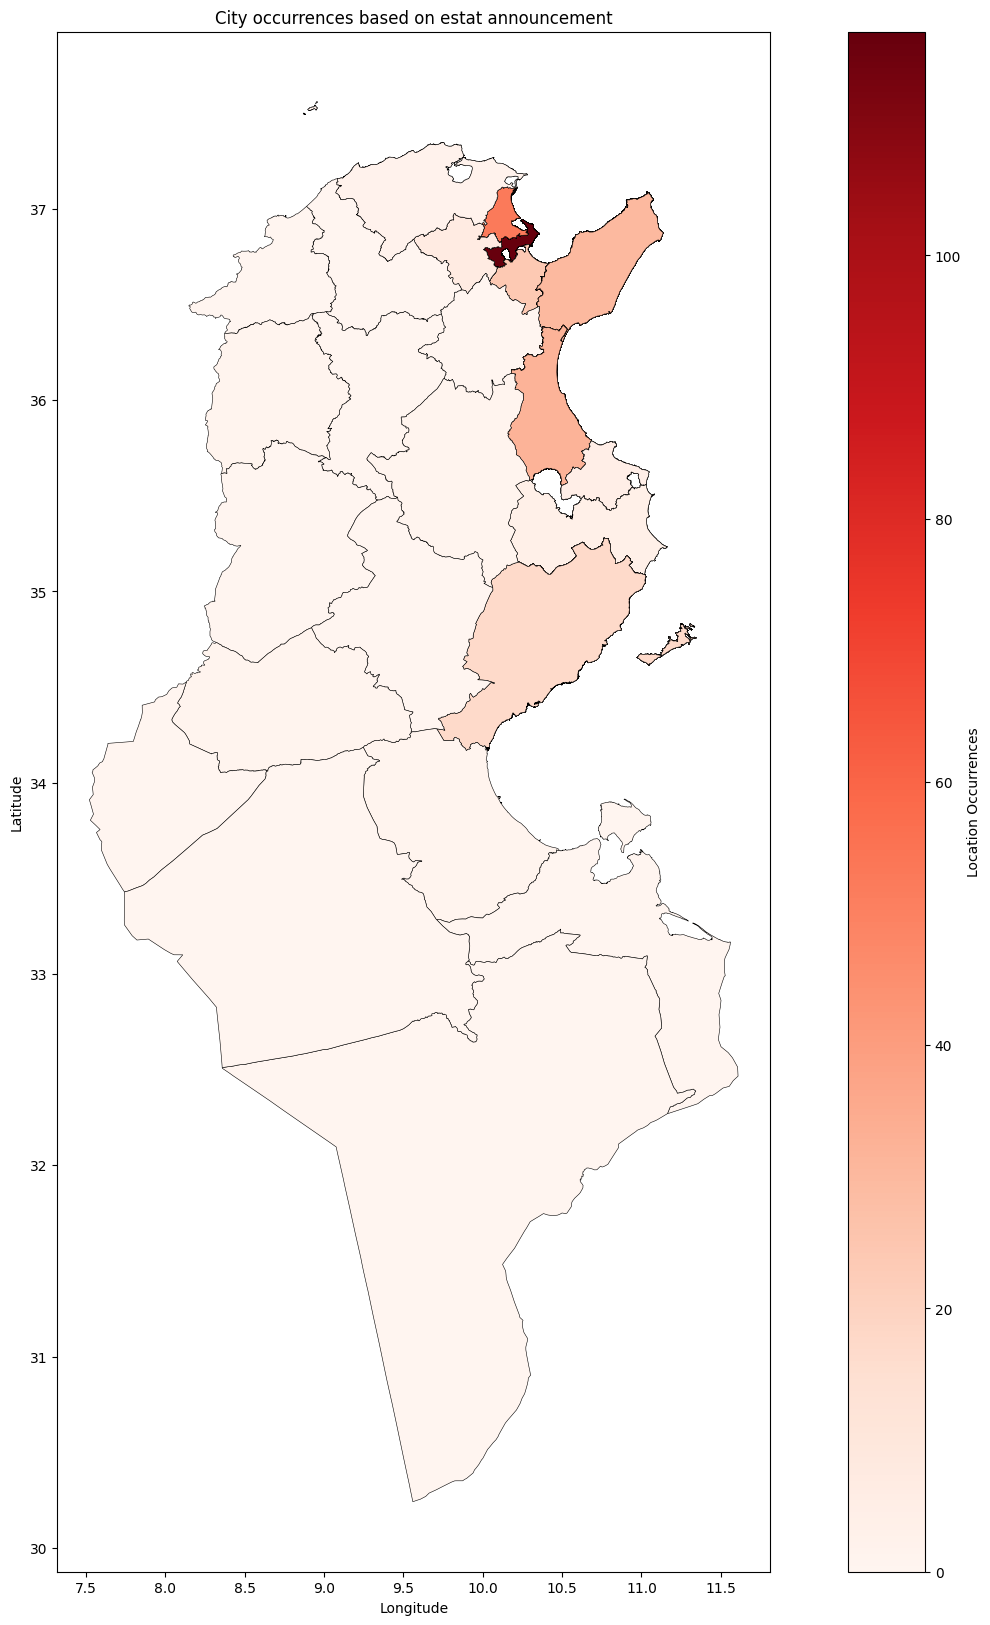

In [166]:
fig, ax = plt.subplots(1, figsize=(20, 20))
Tunisia.plot(column='Count', cmap='Reds', ax=ax, legend=True, legend_kwds={'label': "Location Occurrences"},edgecolor='black', linewidth = 0.4)

ax.set_title('City occurrences based on estat announcement')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [156]:
Tunisia

,Shape_Leng,Shape_Area,ADM2_EN,ADM1_EN,ADM0_EN,ADM0_PCODE,geometry,Prices(DT),Estat_types,Descriptions,Locations
0,1.609485,0.026511,Tunis,North East,Tunisia,TN,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",80.0,Locations de vacances,Appartement S1 luxueux meublé pour vos vacance...,Tunis
1,1.609485,0.026511,Tunis,North East,Tunisia,TN,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",1600.0,Appartements,A louer un S+2 avec vue sur lac aux jardins de...,Tunis
2,1.609485,0.026511,Tunis,North East,Tunisia,TN,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",100.0,Locations de vacances,location vacances appartement deux chambres sa...,Tunis
3,1.609485,0.026511,Tunis,North East,Tunisia,TN,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",2700.0,Maisons et Villas,A LOUER étage villà s3 à la marsa vue panoramique,Tunis
4,1.609485,0.026511,Tunis,North East,Tunisia,TN,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",850.0,"Magasins, Commerces et Locaux industriels",Louer local salon coiffure centre ville tunis,Tunis
...,...,...,...,...,...,...,...,...,...,...,...
300,9.757171,0.896620,Médenine,South East,Tunisia,TN,"MULTIPOLYGON (((10.91283 33.90123, 10.90942 33...",NaN,NaN,NaN,NaN
301,11.073193,3.620439,Tataouine,South East,Tunisia,TN,"POLYGON ((11.16363 32.27027, 11.14555 32.26120...",NaN,NaN,NaN,NaN
302,4.548769,0.740293,Gafsa,South West,Tunisia,TN,"POLYGON ((9.54859 34.26473, 9.54864 34.26378, ...",499.0,Maisons et Villas,A louer une villa à Sidi Ahmed Zarrouk à Gafse,Gafsa
303,3.798989,0.590755,Tozeur,South West,Tunisia,TN,"POLYGON ((8.64039 34.06099, 8.64021 34.06082, ...",NaN,NaN,NaN,NaN


In [ ]:
# Calculate the location occurrences as you did in your code
location_counts = df['Locations'].value_counts()

# Create a new DataFrame for location data
location_data = pd.DataFrame({'Location': location_counts.index, 'Count': location_counts.values})

# Merge the location data with the GeoDataFrame based on a common attribute (e.g., city or region names)
merged_gdf = gdf.merge(location_data, left_on='CityName', right_on='Location', how='left')

# Replace NaN values with a color (e.g., gray)
merged_gdf['Count'].fillna(0, inplace=True)  # Fill NaN with 0
merged_gdf['Count'] = merged_gdf['Count'].astype(int)  # Convert Count to integer

# Plot the map
fig, ax = plt.subplots(1, figsize=(12, 12))
merged_gdf.plot(column='Count', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Location Occurrences"})
ax.set_title('Location Occurrences')
ax.get_legend().set_title('Occurrences')

plt.show()








In [ ]:
Tunisia.to_file('shapefile/Tunisia_Tayara_Estat_Case_Study.shp')

C:\Users\sayeh omar\AppData\Local\Temp\ipykernel_16320\3514052673.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Tunisia.to_file('shapefile/Tunisia_Tayara_Estat_Case_Study.shp')
